<a href="https://colab.research.google.com/github/phsm99/ciencia-de-dados/blob/main/AutoML/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook copiado do vídeo: https://www.youtube.com/watch?v=91QljBnvM7s

Notebook original: https://github.com/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb

In [2]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Wed Jun 22 00:10:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [4]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 49 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=36cbf648bbcc6df6b448b7267401c900596cbaa25507e3003ec47daca2af065b
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [5]:
 import h2o

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7d3_13a8
  JVM stdout: /tmp/tmp7d3_13a8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7d3_13a8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_hvf86y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
from h2o.automl import H2OAutoML

In [8]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/phsm99/ciencia-de-dados/main/AutoML/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [10]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [12]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No


In [13]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [14]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [15]:
!nvidia-smi

Wed Jun 22 00:10:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
00:10:58.197: Project: AutoML_1_20220622_01058
00:10:58.198: Cross-validation disabled by user: no fold column nor nfolds > 1.
00:10:58.198: Setting stopping tolerance adaptively based on the training frame: 0.014275521124027076
00:10:58.198: Build control seed: 10
00:10:58.199: training frame: Frame key: AutoML_1_20220622_01058_training_py_2_sid_957e    cols: 21    rows: 4907  chunks: 8    size: 265026  checksum: 7843881461930490655
00:10:58.200: validation frame: Frame key: py_4_sid_957e    cols: 21    rows: 1052  chunks: 8    size: 138333  checksum: 2209883681020291419
00:10:58.200: leaderboard frame: Frame key: py_4_sid_957e    cols: 21    rows: 1052  chunks: 8    size: 138333  checksum: 2209883681020291419
00:10:58.200: blending frame: NULL
00:10:58.200: response column: Churn
00:10:58.200: fold column: null
00:10:58.201: weights column: null
00:10:58.241: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 6.974E-4 ),"nlambda = 30, lambda.max = 15.428, lambda.min = 6.974E-4, lambda.1...",45,45,43,AutoML_1_20220622_01058_training_py_2_sid_957e




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13468661365648685
RMSE: 0.3669967488363989
LogLoss: 0.4145772149981537
Null degrees of freedom: 4906
Residual degrees of freedom: 4861
Null deviance: 5669.860611377293
Residual deviance: 4068.66078799188
AIC: 4160.66078799188
AUC: 0.846923203035042
AUCPR: 0.6570031540307807
Gini: 0.693846406070084

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3122332441389276: 


,,No,Yes,Error,Rate
0,No,2806.0,803.0,0.2225,(803.0/3609.0)
1,Yes,309.0,989.0,0.2381,(309.0/1298.0)
2,Total,3115.0,1792.0,0.2266,(1112.0/4907.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312233,0.640129,212.0
1,max f2,0.154982,0.749620,294.0
2,max f0point5,0.488532,0.633472,136.0
3,max accuracy,0.488532,0.805584,136.0
4,max precision,0.850412,1.000000,0.0
5,max recall,0.003944,1.000000,396.0
6,max specificity,0.850412,1.000000,0.0
7,max absolute_mcc,0.312233,0.494171,212.0
8,max min_per_class_accuracy,0.302086,0.769465,217.0
9,max mean_per_class_accuracy,0.255539,0.770427,241.0



Gains/Lift Table: Avg response rate: 26.45 %, avg score: 26.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010190,0.780933,3.402388,3.402388,0.900000,0.803513,0.900000,0.803513,0.034669,0.034669,240.238829,240.238829,0.033283
1,2,0.020175,0.759644,3.163218,3.284011,0.836735,0.770497,0.868687,0.787172,0.031587,0.066256,216.321814,228.401114,0.062654
2,3,0.030161,0.743098,3.163218,3.244019,0.836735,0.750022,0.858108,0.774872,0.031587,0.097843,216.321814,224.401886,0.092024
3,4,0.040147,0.731856,3.086066,3.204731,0.816327,0.736935,0.847716,0.765436,0.030817,0.128659,208.606648,220.473121,0.120347
4,5,0.050132,0.714723,2.777460,3.119624,0.734694,0.722182,0.825203,0.756821,0.027735,0.156394,177.745983,211.962431,0.144480
5,6,0.100061,0.650218,2.592296,2.856497,0.685714,0.684004,0.755601,0.720486,0.129430,0.285824,159.229584,185.649707,0.252574
6,7,0.149990,0.588851,2.299120,2.670957,0.608163,0.618851,0.706522,0.686654,0.114792,0.400616,129.911952,167.095699,0.340766
7,8,0.200122,0.528903,2.136097,2.536970,0.565041,0.557282,0.671079,0.654245,0.107088,0.507704,113.609744,153.696977,0.418206
8,9,0.299980,0.393736,1.635615,2.236926,0.432653,0.456743,0.591712,0.588500,0.163328,0.671032,63.561523,123.692648,0.504504
9,10,0.400041,0.273568,1.224213,1.983619,0.323829,0.329710,0.524707,0.523770,0.122496,0.793529,22.421303,98.361914,0.535008




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13523470083219977
RMSE: 0.3677427101006895
LogLoss: 0.4213618927261666
Null degrees of freedom: 1051
Residual degrees of freedom: 1006
Null deviance: 1231.3468875853757
Residual deviance: 886.5454222958545
AIC: 978.5454222958545
AUC: 0.8461743869707316
AUCPR: 0.6951636383891506
Gini: 0.6923487739414631

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40450617975861947: 


,,No,Yes,Error,Rate
0,No,639.0,127.0,0.1658,(127.0/766.0)
1,Yes,87.0,199.0,0.3042,(87.0/286.0)
2,Total,726.0,326.0,0.2034,(214.0/1052.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404506,0.650327,167.0
1,max f2,0.160256,0.758980,283.0
2,max f0point5,0.519053,0.660454,120.0
3,max accuracy,0.519053,0.812738,120.0
4,max precision,0.833465,1.000000,0.0
5,max recall,0.006686,1.000000,393.0
6,max specificity,0.833465,1.000000,0.0
7,max absolute_mcc,0.478268,0.515606,135.0
8,max min_per_class_accuracy,0.315570,0.758486,206.0
9,max mean_per_class_accuracy,0.404506,0.765004,167.0



Gains/Lift Table: Avg response rate: 27.19 %, avg score: 27.37 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010456,0.776592,3.678322,3.678322,1.000000,0.799643,1.000000,0.799643,0.038462,0.038462,267.832168,267.832168,0.038462
1,2,0.020913,0.752512,3.343929,3.511125,0.909091,0.765081,0.954545,0.782362,0.034965,0.073427,234.392880,251.112524,0.072121
2,3,0.030418,0.739073,2.942657,3.333479,0.800000,0.744021,0.906250,0.770380,0.027972,0.101399,194.265734,233.347902,0.097482
3,4,0.040875,0.724609,3.009536,3.250610,0.818182,0.731928,0.883721,0.760544,0.031469,0.132867,200.953592,225.060986,0.126340
4,5,0.050380,0.716522,3.310490,3.261908,0.900000,0.719834,0.886792,0.752863,0.031469,0.164336,231.048951,226.190790,0.156503
5,6,0.100760,0.664866,2.706690,2.984299,0.735849,0.689586,0.811321,0.721224,0.136364,0.300699,170.668954,198.429872,0.274590
6,7,0.150190,0.608818,2.334320,2.770382,0.634615,0.637633,0.753165,0.693713,0.115385,0.416084,133.431953,177.038152,0.365170
7,8,0.200570,0.546394,1.873862,2.545189,0.509434,0.576432,0.691943,0.664254,0.094406,0.510490,87.386199,154.518941,0.425633
8,9,0.300380,0.411990,1.716550,2.269850,0.466667,0.479847,0.617089,0.602979,0.171329,0.681818,71.655012,126.985040,0.523855
9,10,0.400190,0.291377,0.945854,1.939638,0.257143,0.349700,0.527316,0.539810,0.094406,0.776224,-5.414585,93.963756,0.516433




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-22 00:11:02,0.000 sec,2,.15E2,46.0,1.14223,1.156955,0.0,NaN,...,,,,,,,,,,
1,,2022-06-22 00:11:03,0.107 sec,4,.96E1,46.0,1.134657,1.149212,0.0,NaN,...,,,,,,,,,,
2,,2022-06-22 00:11:02,2.506 sec,5,None,NaN,,,,5.0,...,0.657003,3.402388,0.226615,0.367743,0.421362,0.316836,0.846174,0.695164,3.678322,0.203422
3,,2022-06-22 00:11:03,0.193 sec,6,.6E1,46.0,1.12319,1.137485,0.0,NaN,...,,,,,,,,,,
4,,2022-06-22 00:11:03,0.274 sec,8,.37E1,46.0,1.106407,1.120315,0.0,NaN,...,,,,,,,,,,
5,,2022-06-22 00:11:03,0.340 sec,10,.23E1,46.0,1.083051,1.096402,0.0,NaN,...,,,,,,,,,,
6,,2022-06-22 00:11:03,0.405 sec,12,.14E1,46.0,1.05275,1.065342,0.0,NaN,...,,,,,,,,,,
7,,2022-06-22 00:11:03,0.474 sec,14,.88E0,46.0,1.016829,1.028452,0.0,NaN,...,,,,,,,,,,
8,,2022-06-22 00:11:03,0.530 sec,16,.55E0,46.0,0.978525,0.989003,0.0,NaN,...,,,,,,,,,,
9,,2022-06-22 00:11:03,0.591 sec,18,.34E0,46.0,0.941944,0.951192,0.0,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,1.260505,1.000000,0.161583
1,Contract.Two year,0.726712,0.576524,0.093157
2,Contract.Month-to-month,0.663261,0.526187,0.085023
3,TotalCharges,0.528634,0.419382,0.067765
4,InternetService.Fiber optic,0.380806,0.302106,0.048815
5,InternetService.DSL,0.316492,0.251083,0.040571
6,PaymentMethod.Electronic check,0.299385,0.237512,0.038378
7,OnlineSecurity.No,0.271635,0.215497,0.034821
8,TechSupport.No,0.212000,0.168186,0.027176
9,OnlineSecurity.Yes,0.208997,0.165804,0.026791



See the whole table with table.as_data_frame()


In [17]:
!nvidia-smi

Wed Jun 22 00:11:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |    138MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
lb = aml.leaderboard

In [19]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20220622_01058,0.846174,0.421362,0.695164,0.234996,0.367743,0.135235
GBM_1_AutoML_1_20220622_01058,0.845216,0.419076,0.685463,0.240706,0.367839,0.135305
XGBoost_3_AutoML_1_20220622_01058,0.839362,0.431662,0.650886,0.231527,0.374667,0.140375
GBM_2_AutoML_1_20220622_01058,0.836123,0.433089,0.655696,0.248142,0.373801,0.139727
XRT_1_AutoML_1_20220622_01058,0.835947,0.431893,0.662849,0.250078,0.373413,0.139437
XGBoost_1_AutoML_1_20220622_01058,0.835925,0.438082,0.664907,0.237351,0.374826,0.140494
GBM_3_AutoML_1_20220622_01058,0.834685,0.436511,0.650987,0.237634,0.376832,0.142002
DRF_1_AutoML_1_20220622_01058,0.829141,0.50283,0.63465,0.242039,0.377662,0.142629
GBM_4_AutoML_1_20220622_01058,0.828984,0.448681,0.637421,0.234745,0.381621,0.145634
XGBoost_2_AutoML_1_20220622_01058,0.827966,0.454244,0.637188,0.241806,0.382693,0.146454


In [20]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [21]:
churn_pred.head()

predict,No,Yes
Yes,0.298927,0.701073
Yes,0.377208,0.622792
No,0.987442,0.0125582
No,0.972611,0.0273887
Yes,0.552794,0.447206
No,0.814104,0.185896
No,0.92474,0.0752597
No,0.611234,0.388766
No,0.689066,0.310934
No,0.992479,0.00752052


In [22]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13296665130534957
RMSE: 0.364645925940973
LogLoss: 0.40736803568476365
Null degrees of freedom: 1083
Residual degrees of freedom: 1038
Null deviance: 1248.9645253832334
Residual deviance: 883.1739013645677
AIC: 975.1739013645677
AUC: 0.8527677140285005
AUCPR: 0.6476821524806373
Gini: 0.705535428057001

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29820897612293806: 


,,No,Yes,Error,Rate
0,No,599.0,200.0,0.2503,(200.0/799.0)
1,Yes,55.0,230.0,0.193,(55.0/285.0)
2,Total,654.0,430.0,0.2352,(255.0/1084.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.298209,0.643357,206.0
1,max f2,0.156609,0.768355,286.0
2,max f0point5,0.526707,0.656871,110.0
3,max accuracy,0.526707,0.816421,110.0
4,max precision,0.833916,1.000000,0.0
5,max recall,0.008706,1.000000,390.0
6,max specificity,0.833916,1.000000,0.0
7,max absolute_mcc,0.298209,0.500954,206.0
8,max min_per_class_accuracy,0.321434,0.770964,196.0
9,max mean_per_class_accuracy,0.298209,0.778352,206.0



Gains/Lift Table: Avg response rate: 26.29 %, avg score: 27.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010148,0.788618,2.766188,2.766188,0.727273,0.814007,0.727273,0.814007,0.028070,0.028070,176.618820,176.618820,0.024315
1,2,0.020295,0.766615,2.766188,2.766188,0.727273,0.779589,0.727273,0.796798,0.028070,0.056140,176.618820,176.618820,0.048631
2,3,0.030443,0.751185,3.457735,2.996704,0.909091,0.758510,0.787879,0.784035,0.035088,0.091228,245.773525,199.670388,0.082467
3,4,0.040590,0.739727,2.420415,2.852632,0.636364,0.744058,0.750000,0.774041,0.024561,0.115789,142.041467,185.263158,0.102022
4,5,0.050738,0.726899,2.766188,2.835343,0.727273,0.732884,0.745455,0.765810,0.028070,0.143860,176.618820,183.534290,0.126338
5,6,0.100554,0.664022,2.887849,2.861355,0.759259,0.689790,0.752294,0.728149,0.143860,0.287719,188.784925,186.135522,0.253927
6,7,0.150369,0.594604,2.535673,2.753460,0.666667,0.629298,0.723926,0.695401,0.126316,0.414035,153.567251,175.346034,0.357715
7,8,0.200185,0.528814,2.324366,2.646681,0.611111,0.565933,0.695853,0.663183,0.115789,0.529825,132.436647,164.668122,0.447221
8,9,0.299815,0.418524,1.232619,2.176777,0.324074,0.472561,0.572308,0.599838,0.122807,0.652632,23.261858,117.677733,0.478664
9,10,0.400369,0.293130,1.570256,2.024448,0.412844,0.352342,0.532258,0.537679,0.157895,0.810526,57.025592,102.444822,0.556459


In [23]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [24]:
model_ids

['GLM_1_AutoML_1_20220622_01058',
 'GBM_1_AutoML_1_20220622_01058',
 'XGBoost_3_AutoML_1_20220622_01058',
 'GBM_2_AutoML_1_20220622_01058',
 'XRT_1_AutoML_1_20220622_01058',
 'XGBoost_1_AutoML_1_20220622_01058',
 'GBM_3_AutoML_1_20220622_01058',
 'DRF_1_AutoML_1_20220622_01058',
 'GBM_4_AutoML_1_20220622_01058',
 'XGBoost_2_AutoML_1_20220622_01058']

In [25]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220622_01058


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10802190568354811
RMSE: 0.32866686124942396
LogLoss: 0.3393430529370058
Mean Per-Class Error: 0.17400419085824217
AUC: 0.9058485014992053
AUCPR: 0.7791375841120338
Gini: 0.8116970029984105

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33451369404792786: 


,,No,Yes,Error,Rate
0,No,3012.0,597.0,0.1654,(597.0/3609.0)
1,Yes,237.0,1061.0,0.1826,(237.0/1298.0)
2,Total,3249.0,1658.0,0.17,(834.0/4907.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.334514,0.717862,219.0
1,max f2,0.189612,0.803822,281.0
2,max f0point5,0.536859,0.725494,140.0
3,max accuracy,0.534065,0.844100,141.0
4,max precision,0.971082,1.000000,0.0
5,max recall,0.013536,1.000000,385.0
6,max specificity,0.971082,1.000000,0.0
7,max absolute_mcc,0.334514,0.608003,219.0
8,max min_per_class_accuracy,0.322257,0.825116,224.0
9,max mean_per_class_accuracy,0.288254,0.828878,238.0



Gains/Lift Table: Avg response rate: 26.45 %, avg score: 26.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010190,0.913687,3.704823,3.704823,0.980000,0.932052,0.980000,0.932052,0.037750,0.037750,270.482280,270.482280,0.037473
1,2,0.020583,0.881205,3.632179,3.668141,0.960784,0.896280,0.970297,0.913989,0.037750,0.075501,263.217922,266.814139,0.074670
2,3,0.030161,0.856363,3.619562,3.652714,0.957447,0.870002,0.966216,0.900020,0.034669,0.110169,261.956201,265.271415,0.108784
3,4,0.040351,0.838237,3.251171,3.551314,0.860000,0.847641,0.939394,0.886793,0.033128,0.143297,225.117103,255.131438,0.139972
4,5,0.050132,0.807364,3.465395,3.534550,0.916667,0.821268,0.934959,0.874008,0.033898,0.177196,246.539548,253.454971,0.172762
5,6,0.100061,0.694123,3.116927,3.326164,0.824490,0.748364,0.879837,0.811314,0.155624,0.332820,211.692714,232.616370,0.316472
6,7,0.149990,0.603200,2.654017,3.102419,0.702041,0.647478,0.820652,0.756776,0.132512,0.465331,165.401717,210.241927,0.428756
7,8,0.200122,0.531187,2.335876,2.910393,0.617886,0.565134,0.769857,0.708768,0.117103,0.582435,133.587633,191.039324,0.519813
8,9,0.299980,0.381220,1.782203,2.534841,0.471429,0.454254,0.670516,0.624045,0.177966,0.760401,78.220339,153.484091,0.626014
9,10,0.400041,0.256393,1.131820,2.183907,0.299389,0.317763,0.577687,0.547435,0.113251,0.873652,13.181959,118.390690,0.643948




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14037501696247925
RMSE: 0.37466654102345365
LogLoss: 0.4316623646144184
Mean Per-Class Error: 0.23152695868100567
AUC: 0.8393616827037192
AUCPR: 0.6508863675022524
Gini: 0.6787233654074385

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26653020083904266: 


,,No,Yes,Error,Rate
0,No,572.0,194.0,0.2533,(194.0/766.0)
1,Yes,60.0,226.0,0.2098,(60.0/286.0)
2,Total,632.0,420.0,0.2414,(254.0/1052.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.266530,0.640227,236.0
1,max f2,0.167958,0.757212,277.0
2,max f0point5,0.563906,0.628415,126.0
3,max accuracy,0.563906,0.797529,126.0
4,max precision,0.948633,1.000000,0.0
5,max recall,0.007622,1.000000,390.0
6,max specificity,0.948633,1.000000,0.0
7,max absolute_mcc,0.266530,0.487803,236.0
8,max min_per_class_accuracy,0.284146,0.759791,228.0
9,max mean_per_class_accuracy,0.266530,0.768473,236.0



Gains/Lift Table: Avg response rate: 27.19 %, avg score: 27.51 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010456,0.904470,2.675143,2.675143,0.727273,0.924761,0.727273,0.924761,0.027972,0.027972,167.514304,167.514304,0.024056
1,2,0.020913,0.883354,3.343929,3.009536,0.909091,0.892028,0.818182,0.908395,0.034965,0.062937,234.392880,200.953592,0.057715
2,3,0.030418,0.859690,3.310490,3.103584,0.900000,0.873222,0.843750,0.897403,0.031469,0.094406,231.048951,210.358392,0.087878
3,4,0.040875,0.841941,3.343929,3.165067,0.909091,0.849804,0.860465,0.885227,0.034965,0.129371,234.392880,216.506749,0.121538
4,5,0.050380,0.828429,2.942657,3.123103,0.800000,0.834999,0.849057,0.875750,0.027972,0.157343,194.265734,212.310331,0.146899
5,6,0.100760,0.735737,2.637287,2.880195,0.716981,0.776821,0.783019,0.826285,0.132867,0.290210,163.728724,188.019528,0.260184
6,7,0.150190,0.626628,2.192846,2.653979,0.596154,0.678247,0.721519,0.777564,0.108392,0.398601,119.284562,165.397893,0.341160
7,8,0.200570,0.555582,1.735057,2.423160,0.471698,0.586947,0.658768,0.729684,0.087413,0.486014,73.505740,142.315978,0.392019
8,9,0.300380,0.406408,1.716550,2.188369,0.466667,0.481931,0.594937,0.647361,0.171329,0.657343,71.655012,118.836859,0.490241
9,10,0.400190,0.265274,1.331202,1.974586,0.361905,0.331661,0.536817,0.568623,0.132867,0.790210,33.120213,97.458598,0.535641




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-22 00:11:22,0.003 sec,0.0,0.500000,0.693147,0.500000,0.264520,1.000000,0.735480,0.500000,0.693147,0.500000,0.271863,1.000000,0.728137
1,,2022-06-22 00:11:22,0.077 sec,5.0,0.363657,0.423170,0.868804,0.706351,3.629214,0.194620,0.374504,0.442682,0.844727,0.665602,2.675143,0.211977
2,,2022-06-22 00:11:22,0.146 sec,10.0,0.348586,0.380977,0.880390,0.725985,3.629214,0.188710,0.368796,0.420066,0.846727,0.668178,2.829478,0.242395
3,,2022-06-22 00:11:22,0.221 sec,15.0,0.342371,0.365943,0.887558,0.743880,3.629214,0.189525,0.370026,0.420898,0.844978,0.666546,3.009536,0.214829
4,,2022-06-22 00:11:22,0.340 sec,20.0,0.334838,0.351555,0.898048,0.764252,3.704823,0.177298,0.371816,0.425983,0.842087,0.659318,2.675143,0.265209
5,,2022-06-22 00:11:22,0.460 sec,25.0,0.332130,0.345902,0.901836,0.771485,3.704823,0.177909,0.373156,0.429249,0.839503,0.653621,2.675143,0.248099
6,,2022-06-22 00:11:22,0.555 sec,30.0,0.328667,0.339343,0.905849,0.779138,3.704823,0.169961,0.374667,0.431662,0.839362,0.650886,2.675143,0.241445



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,820.098816,1.000000,0.209268
1,TotalCharges,511.086151,0.623201,0.130416
2,tenure,475.576996,0.579902,0.121355
3,OnlineSecurity.No,443.220520,0.540448,0.113098
4,MonthlyCharges,400.001434,0.487748,0.102070
5,TechSupport.No,234.448181,0.285878,0.059825
6,InternetService.DSL,137.079620,0.167150,0.034979
7,PaymentMethod.Electronic check,92.522369,0.112819,0.023609
8,InternetService.Fiber optic,81.703415,0.099626,0.020849
9,PaperlessBilling.No,76.061729,0.092747,0.019409



See the whole table with table.as_data_frame()


In [26]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [27]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [28]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [29]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220622_01058


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10802190568354811
RMSE: 0.32866686124942396
LogLoss: 0.3393430529370058
Mean Per-Class Error: 0.17400419085824217
AUC: 0.9058485014992053
AUCPR: 0.7791375841120338
Gini: 0.8116970029984105

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33451369404792786: 


,,No,Yes,Error,Rate
0,No,3012.0,597.0,0.1654,(597.0/3609.0)
1,Yes,237.0,1061.0,0.1826,(237.0/1298.0)
2,Total,3249.0,1658.0,0.17,(834.0/4907.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.334514,0.717862,219.0
1,max f2,0.189612,0.803822,281.0
2,max f0point5,0.536859,0.725494,140.0
3,max accuracy,0.534065,0.844100,141.0
4,max precision,0.971082,1.000000,0.0
5,max recall,0.013536,1.000000,385.0
6,max specificity,0.971082,1.000000,0.0
7,max absolute_mcc,0.334514,0.608003,219.0
8,max min_per_class_accuracy,0.322257,0.825116,224.0
9,max mean_per_class_accuracy,0.288254,0.828878,238.0



Gains/Lift Table: Avg response rate: 26.45 %, avg score: 26.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010190,0.913687,3.704823,3.704823,0.980000,0.932052,0.980000,0.932052,0.037750,0.037750,270.482280,270.482280,0.037473
1,2,0.020583,0.881205,3.632179,3.668141,0.960784,0.896280,0.970297,0.913989,0.037750,0.075501,263.217922,266.814139,0.074670
2,3,0.030161,0.856363,3.619562,3.652714,0.957447,0.870002,0.966216,0.900020,0.034669,0.110169,261.956201,265.271415,0.108784
3,4,0.040351,0.838237,3.251171,3.551314,0.860000,0.847641,0.939394,0.886793,0.033128,0.143297,225.117103,255.131438,0.139972
4,5,0.050132,0.807364,3.465395,3.534550,0.916667,0.821268,0.934959,0.874008,0.033898,0.177196,246.539548,253.454971,0.172762
5,6,0.100061,0.694123,3.116927,3.326164,0.824490,0.748364,0.879837,0.811314,0.155624,0.332820,211.692714,232.616370,0.316472
6,7,0.149990,0.603200,2.654017,3.102419,0.702041,0.647478,0.820652,0.756776,0.132512,0.465331,165.401717,210.241927,0.428756
7,8,0.200122,0.531187,2.335876,2.910393,0.617886,0.565134,0.769857,0.708768,0.117103,0.582435,133.587633,191.039324,0.519813
8,9,0.299980,0.381220,1.782203,2.534841,0.471429,0.454254,0.670516,0.624045,0.177966,0.760401,78.220339,153.484091,0.626014
9,10,0.400041,0.256393,1.131820,2.183907,0.299389,0.317763,0.577687,0.547435,0.113251,0.873652,13.181959,118.390690,0.643948




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14037501696247925
RMSE: 0.37466654102345365
LogLoss: 0.4316623646144184
Mean Per-Class Error: 0.23152695868100567
AUC: 0.8393616827037192
AUCPR: 0.6508863675022524
Gini: 0.6787233654074385

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26653020083904266: 


,,No,Yes,Error,Rate
0,No,572.0,194.0,0.2533,(194.0/766.0)
1,Yes,60.0,226.0,0.2098,(60.0/286.0)
2,Total,632.0,420.0,0.2414,(254.0/1052.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.266530,0.640227,236.0
1,max f2,0.167958,0.757212,277.0
2,max f0point5,0.563906,0.628415,126.0
3,max accuracy,0.563906,0.797529,126.0
4,max precision,0.948633,1.000000,0.0
5,max recall,0.007622,1.000000,390.0
6,max specificity,0.948633,1.000000,0.0
7,max absolute_mcc,0.266530,0.487803,236.0
8,max min_per_class_accuracy,0.284146,0.759791,228.0
9,max mean_per_class_accuracy,0.266530,0.768473,236.0



Gains/Lift Table: Avg response rate: 27.19 %, avg score: 27.51 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010456,0.904470,2.675143,2.675143,0.727273,0.924761,0.727273,0.924761,0.027972,0.027972,167.514304,167.514304,0.024056
1,2,0.020913,0.883354,3.343929,3.009536,0.909091,0.892028,0.818182,0.908395,0.034965,0.062937,234.392880,200.953592,0.057715
2,3,0.030418,0.859690,3.310490,3.103584,0.900000,0.873222,0.843750,0.897403,0.031469,0.094406,231.048951,210.358392,0.087878
3,4,0.040875,0.841941,3.343929,3.165067,0.909091,0.849804,0.860465,0.885227,0.034965,0.129371,234.392880,216.506749,0.121538
4,5,0.050380,0.828429,2.942657,3.123103,0.800000,0.834999,0.849057,0.875750,0.027972,0.157343,194.265734,212.310331,0.146899
5,6,0.100760,0.735737,2.637287,2.880195,0.716981,0.776821,0.783019,0.826285,0.132867,0.290210,163.728724,188.019528,0.260184
6,7,0.150190,0.626628,2.192846,2.653979,0.596154,0.678247,0.721519,0.777564,0.108392,0.398601,119.284562,165.397893,0.341160
7,8,0.200570,0.555582,1.735057,2.423160,0.471698,0.586947,0.658768,0.729684,0.087413,0.486014,73.505740,142.315978,0.392019
8,9,0.300380,0.406408,1.716550,2.188369,0.466667,0.481931,0.594937,0.647361,0.171329,0.657343,71.655012,118.836859,0.490241
9,10,0.400190,0.265274,1.331202,1.974586,0.361905,0.331661,0.536817,0.568623,0.132867,0.790210,33.120213,97.458598,0.535641




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-22 00:11:22,0.003 sec,0.0,0.500000,0.693147,0.500000,0.264520,1.000000,0.735480,0.500000,0.693147,0.500000,0.271863,1.000000,0.728137
1,,2022-06-22 00:11:22,0.077 sec,5.0,0.363657,0.423170,0.868804,0.706351,3.629214,0.194620,0.374504,0.442682,0.844727,0.665602,2.675143,0.211977
2,,2022-06-22 00:11:22,0.146 sec,10.0,0.348586,0.380977,0.880390,0.725985,3.629214,0.188710,0.368796,0.420066,0.846727,0.668178,2.829478,0.242395
3,,2022-06-22 00:11:22,0.221 sec,15.0,0.342371,0.365943,0.887558,0.743880,3.629214,0.189525,0.370026,0.420898,0.844978,0.666546,3.009536,0.214829
4,,2022-06-22 00:11:22,0.340 sec,20.0,0.334838,0.351555,0.898048,0.764252,3.704823,0.177298,0.371816,0.425983,0.842087,0.659318,2.675143,0.265209
5,,2022-06-22 00:11:22,0.460 sec,25.0,0.332130,0.345902,0.901836,0.771485,3.704823,0.177909,0.373156,0.429249,0.839503,0.653621,2.675143,0.248099
6,,2022-06-22 00:11:22,0.555 sec,30.0,0.328667,0.339343,0.905849,0.779138,3.704823,0.169961,0.374667,0.431662,0.839362,0.650886,2.675143,0.241445



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,820.098816,1.000000,0.209268
1,TotalCharges,511.086151,0.623201,0.130416
2,tenure,475.576996,0.579902,0.121355
3,OnlineSecurity.No,443.220520,0.540448,0.113098
4,MonthlyCharges,400.001434,0.487748,0.102070
5,TechSupport.No,234.448181,0.285878,0.059825
6,InternetService.DSL,137.079620,0.167150,0.034979
7,PaymentMethod.Electronic check,92.522369,0.112819,0.023609
8,InternetService.Fiber optic,81.703415,0.099626,0.020849
9,PaperlessBilling.No,76.061729,0.092747,0.019409



See the whole table with table.as_data_frame()


In [30]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [31]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33451369404792786: 


,,No,Yes,Error,Rate
0,No,3012.0,597.0,0.1654,(597.0/3609.0)
1,Yes,237.0,1061.0,0.1826,(237.0/1298.0)
2,Total,3249.0,1658.0,0.17,(834.0/4907.0)


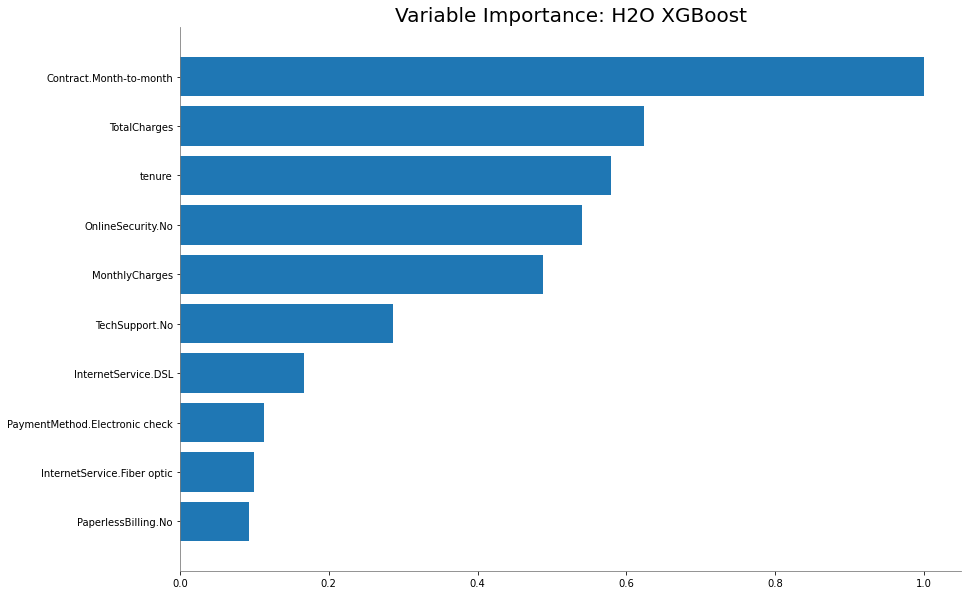

<Figure size 432x288 with 0 Axes>

In [32]:
out.varimp_plot()

In [33]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_1_20220622_01058.zip'